In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import time as t

In [2]:
boston=load_boston()

In [3]:
dir(boston)   # Shows all the files  inside the dataset.

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## All Features of the Dataset
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000(dollars)
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [5]:
X=boston.data

In [6]:
type(X)

numpy.ndarray

In [7]:
X.shape

(506, 13)

In [8]:
y=boston.target

In [9]:
type(y)

numpy.ndarray

In [10]:
y.shape

(506,)

In [11]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
df=pd.DataFrame(X,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df.info()    # There is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
# Normalising data
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
print(u.shape,std.shape)

(13,) (13,)


In [15]:
X=(X-u)/std

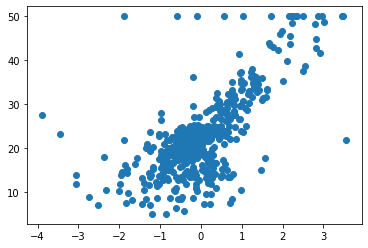

In [16]:
plt.scatter(X[:,5],y) #plotting the values of feature 5 and values of y 
plt.show()

In [17]:
ones=np.ones((X.shape[0],1))   # this ones was added as column for theta 0 to make a generalised form
#X=np.hstack((ones,X))

In [18]:
X=np.concatenate((ones,X),axis=1)

In [19]:
X[:5,:]   

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 , -0.27259857,
        -0.14421743,  0.41367189, -0.12001342,  0.1402136 , -0.98284286,
        -0.66660821, -1.45900038,  0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101, -0.27259857,
        -0.74026221,  0.19427445,  0.36716642,  0.55715988, -0.8678825 ,
        -0.98732948, -0.30309415,  0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101, -0.27259857,
        -0.74026221,  1.28271368, -0.26581176,  0.55715988, -0.8678825 ,
        -0.98732948, -0.30309415,  0.39642699, -1.2087274 ],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771, -0.27259857,
        -0.83528384,  1.01630251, -0.80988851,  1.07773662, -0.75292215,
        -1.10611514,  0.1130321 ,  0.41616284, -1.36151682],
       [ 1.        , -0.41248185, -0.48772236, -1.30687771, -0.27259857,
        -0.83528384,  1.22857665, -0.51117971,  1.07773662, -0.75292215,
        -1.10611514,  0.11

In [20]:
def hypothesis(x,theta):
    m=x.shape[0]
    y_=0.0
    for i in range(m):
        y_+=(theta[i]*x[i])
    
    return y_

In [21]:
def error(X,y,theta):
    m=X.shape[0]
    e=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        e+=(y[i]-y_)**2
    return e/m

In [22]:
def gradient(X,y,theta):
    m=X.shape[0]
    n=X.shape[1]
    grad=np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j] += (y_-y[i])*X[i][j]
            
    return grad/m

In [23]:
def gradientDescent(X,y,learning_rate=0.1,max_epochs=300):
    n=X.shape[1]
    error_list=[]
    
    theta=np.zeros((n,))
    
    for i in range(max_epochs):    # Epochs means trainings the complete data set to the desired times to minimise loss
        e=error(X,y,theta)
        error_list.append(e)
        grad=gradient(X,y,theta)
        
        # updating theta values
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
        
        
    return theta,error_list

In [24]:
start=t.time()
theta,error_list=gradientDescent(X,y)
end=t.time()
print('time taken to execute code', end-start)

time taken to execute code 21.760623931884766


In [25]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


In [26]:
error_array=np.array(error_list)

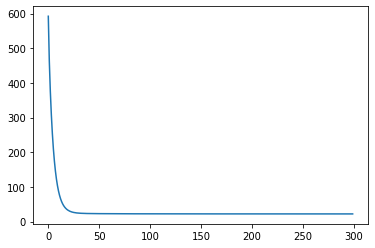

In [27]:
plt.plot(error_array)
plt.show()

### Making Predictions

In [28]:
y_=[]
m=X.shape[0]
for i in range(m):
    pred=hypothesis(X[i],theta)
    y_.append(pred)

In [29]:
y_=np.array(y_)

In [30]:
def r2score(y,y_):
    num=np.sum((y-y_)**2)
    den=np.sum((y-y.mean())**2)
    score=1-num/den
    return score*100

In [31]:
print(r2score(y,y_))

74.04541323942743


## Applying same using SKLEARN Inbuilt Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regr=LinearRegression()

In [34]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
regr.coef_

array([ 0.        , -0.92814606,  1.08156863,  0.1409    ,  0.68173972,
       -2.05671827,  2.67423017,  0.01946607, -3.10404426,  2.66221764,
       -2.07678168, -2.06060666,  0.84926842, -3.74362713])

In [36]:
regr.intercept_

22.532806324110684

## Optimising Code Using Vectorization

In [37]:
def hypothesis_vectorized(X,theta):
    return np.dot(X,theta)

In [38]:
def error_vectorized(X,y,theta):
    e=0.0
    m=X.shape[0]
    y_=hypothesis_vectorized(X,theta)
    e=np.sum((y-y_)**2)
    return e/m

In [39]:
def gradient_vectorized(X,y,theta):
    m=X.shape[0]
    y_=hypothesis_vectorized(X,theta)
    grad = np.dot(X.T,(y_-y))        
    return grad/m

In [40]:
def gradientDescent_vectorized(X,y,learning_rate=0.1,max_epochs=300):
    n=X.shape[1]
    error_lists=[]
    thetas=np.zeros((n,))
    for i in range(max_epochs):    # Epochs means trainings the complete data set to the desired times to minimise loss
        er=error_vectorized(X,y,thetas)
        error_lists.append(er)
        grads=gradient_vectorized(X,y,thetas)
        thetas=thetas-learning_rate*grads
        
    return thetas,error_lists

In [41]:
start=t.time()
thetas,error_lists=gradientDescent_vectorized(X,y)
end=t.time()
print('Time taken to run Vectorized Code is :',end - start)

Time taken to run Vectorized Code is : 0.023001909255981445


In [42]:
# The above code is 20 times faster than the previous code

In [43]:
print(thetas)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


In [44]:
error=np.array(error_lists)

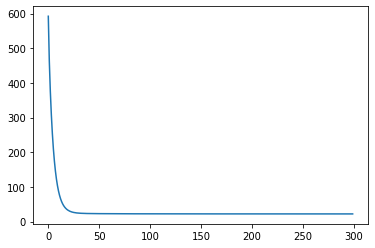

In [45]:
plt.plot(error)